In [3]:
import time
import numpy as np
import xgboost as xgb
from xgboost import plot_importance,plot_tree
from sklearn.datasets import load_iris,load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
import os
%matplotlib inline
warnings.filterwarnings("ignore")

## 基于原生接口的分类问题

In [4]:
#加载数据样本
iris = load_iris()
X,y = iris.data,iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234565)

In [13]:
#训练算法参数设置
params = {
    #通用参数
    'booster':'gbtree' ,  #基学习器,默认 gbtree 为基于树模型提升计算  dart ； gblinear 基于线性模型提升计算
    'nthread':4,       #运行时线程数，缺省时为当前系统获得的最大线程数
#     'silent':0,      # 0表示打印运行信息 ，1不打印，默认 0
    'num_feature':4, #boosting过程中使用的特征维数,会自动设置，不用用户指定
    'seed':1000, #随机树种子
    
    #基学习器学习参数
    'objective':'multi:softmax', #多分类的softmax  二分类逻辑回归 binary:logistic 回归可用reg:squarederror 均方误差
    'num_class':3,   #类别总数
    'gamma':0.1,      #叶子结点进行划分时需要损失函数减小的最小值，越大越不分裂越保守 默认0
    'max_depth':6 ,   #树的最大深度   默认6
    'lambda':2,    # L2 正则化权重   默认1
    'subsample':0.7, #训练模型的样本占总样本的比例  每次boosting 迭代都会采样一次
    'colsampleh_bytree':0.7,   # 建树时对特征进行采样的比例 从全部特征列里随机选择指定比例
#     'colsampleh_bylevel':0.7,  # 树每生长到一层，从该树选择的列里抽样指定比例
#     'colsampleh_bynode':0.7,   # 结点每次分列，从到该层的选择的列里抽样指定比例
    'min_child_weight':3, #叶子结点继续划分的最小样本权重和  若结点分裂导致叶结点样本权重和小于此值，则停止分裂  默认1
    'eta':0.1, # 收缩步长，即学习率   默认0.3
#     'tree_method':'auto',
#     # 选项：auto，exact，approx，hist，gpu\u hist，这是常用更新程序的组合。对于像refresh这样的其他更新程序，直接设置参数updater。
    
#     # 自动：使用启发式选择最快的方法。
    
#     #      对于小数据集，将使用精确贪婪（exact）。

#     #      对于较大的数据集，将选择近似算法（近似）。建议尝试 hist 和 gpu_hist，以便在大数据集上获得更高的性能(gpu（hist）支持外部内存。

#     #      由于以往的行为都是在单机上使用精确贪婪，当用户选择近似算法时会得到一条消息来通知这个选择。

#     # 精确：精确贪婪算法。枚举所有拆分的候选对象。

#     # 近似：使用分位数草图和梯度直方图的近似贪婪算法。

#     # hist：更快的直方图优化近似贪婪算法。

#     # gpu_hist:hist算法的gpu实现。
#     'scale_pos_weight':1    #控制正负样本权重，用于样本比例不均 推荐值：负样本量/正样本量
}
plst = list(params.items())

In [14]:
# 数据集格式转换

dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test)

In [15]:
# 迭代次数， 分类问题为每个类别的迭代次数
num_rounds = 50

#训练
model = xgb.train(plst, dtrain, num_rounds)

[19:43:12] WARNING: ../src/learner.cc:516: 
Parameters: { colsampleh_bytree, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [16]:
# 测试集预测
y_pred = model.predict(dtest)

In [18]:
# 计算准确率
accuracy = accuracy_score(y_test,y_pred)
print('acc: {} '.format(accuracy*100.0))
print('acc: %.2f %%' % (accuracy*100.0))

acc: 96.66666666666667 
acc: 96.67 %


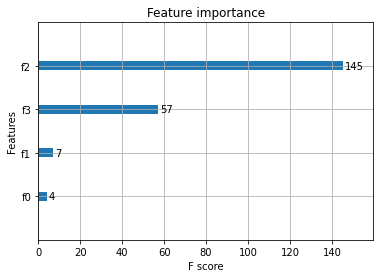

In [19]:
# 显示重要特征
plot_importance(model)
plt.show()

PermissionError: [Errno 13] Permission denied

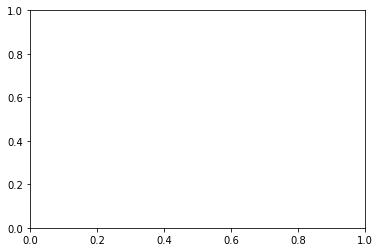

In [23]:
# 可视化树的生成情况，num_trees是树的索引
plot_tree(model,num_trees=5)

In [24]:
# 将基学习器输出到txt文件
model.dump_model("model1.txt")
#文件一共有150个弱学习器，因为迭代轮次50次 * 类别 3 = 150

## 基于原生接口的回归问题

In [26]:
boston = load_boston()

#获取 特征列 和 标签列
X,y = boston.data,boston.target

#获取特征名称
feature_name = boston.feature_names

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
# 参数设置
params = {
    #通用参数
    'booster':'gbtree' ,  #基学习器,默认 gbtree 为基于树模型提升计算  dart ； gblinear 基于线性模型提升计算
    'nthread':4,       #运行时线程数，缺省时为当前系统获得的最大线程数
    'seed':1000, #随机树种子
    'objective':'reg:gamma', # gamma 回归
    'gamma':0.1,      #叶子结点进行划分时需要损失函数减小的最小值，越大越不分裂越保守 默认0
    'max_depth':6 ,   #树的最大深度   默认6
    'lambda':2,    # L2 正则化权重   默认1
    'subsample':0.7, #训练模型的样本占总样本的比例  每次boosting 迭代都会采样一次
    'colsampleh_bytree':0.7,   # 建树时对特征进行采样的比例 从全部特征列里随机选择指定比例
    'min_child_weight':3, #叶子结点继续划分的最小样本权重和  若结点分裂导致叶结点样本权重和小于此值，则停止分裂  默认1
    'eta':0.1, # 收缩步长
    'silent':1
}
plst = list(params.items())

In [31]:
# 数据集格式转换
dtrain = xgb.DMatrix(X_train,y_train,feature_names=feature_name) 
dtest = xgb.DMatrix(X_test,y_test,feature_names=feature_name) 

In [33]:
# 模型训练
num_rounds = 30
model =xgb.train(plst ,dtrain ,num_rounds)

[20:07:50] WARNING: ../src/learner.cc:516: 
Parameters: { colsampleh_bytree, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [34]:
# 预测
y_pred = model.predict(dtest)

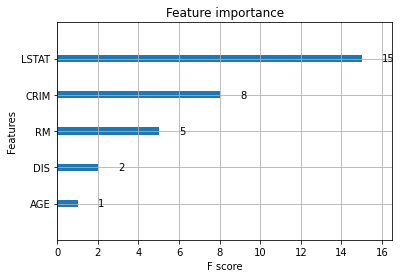

In [35]:
# 显示重要特征
plot_importance(model,importance_type = 'weight')
plt.show()

PermissionError: [Errno 13] Permission denied

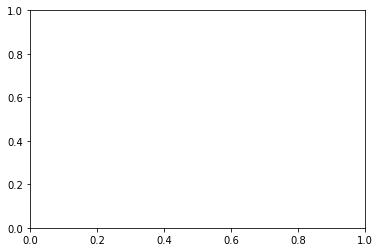

In [36]:
# 可视化树生成情况，
plot_tree(model,num_trees=17)

In [37]:
model.dump_model("model2.txt")
# 30个基学习器

##  基于sklearn 接口实现分类

In [38]:
# 加载数据样本
iris = load_iris()
X,y = iris.data,iris.target
# 获取特征名称
feature_name = iris.feature_names
# 划分训练测试
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)
# 模型训练
model = xgb.XGBClassifier(
    max_depth=5,n_estimators=50,silent=False,
    objective='multi:softmax',
    feature_names=feature_name
)
model.fit(X_train,y_train)

[20:15:00] WARNING: ../src/learner.cc:516: 
Parameters: { feature_names, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              feature_names=['sepal length (cm)', 'sepal width (cm)',
                             'petal length (cm)', 'petal width (cm)'],
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, silent=False,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [39]:
# 预测
y_pred = model.predict(X_test)

# 预测每条数据概率列表
y2 = model.predict_proba(X_test)

In [41]:
# 计算准确率
acc =accuracy_score(y_test,y_pred)
print(acc*100.0)

100.0


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

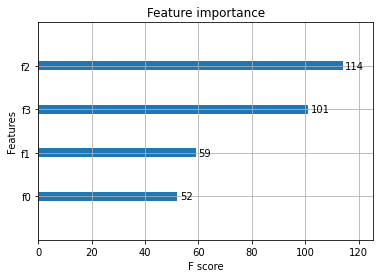

In [42]:
plot_importance(model)

## 基于sklearn 接口实现回归

In [43]:
boston = load_boston()

#获取 特征列 和 标签列
X,y = boston.data,boston.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

model = xgb.XGBRegressor(
    max_depth=5,n_estimators=50,silent=False,
    objective='reg:gamma',
    learning_rate=0.1
)

model.fit(X_train,y_train)

[20:19:28] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=0, num_parallel_tree=1,
             objective='reg:gamma', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=None, silent=False, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y_pred = model.predict(X_test)

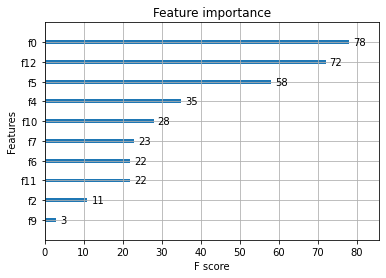

In [45]:
plot_importance(model)
plt.show()